# Data Set: Corporate Energy CONSUMPTION – Open Calgary

## Introduction

Calgary has long been known as an energy city and is being recognized as a leader in the global energy transition. The weather in Calgary is slowly changing due to global warming. In 2021, for the first time in history, total electricity use hit a record high as a result of an increase in air conditioning use in the summer. Calgary typically peaks in energy use in winter, but that's likely to change now. When the temperature rises due to climate change, it is predicted that the use of energy for cooling will increase, which will result in more greenhouse gas emissions, which will lead to a vicious cycle of raising the temperature again. Currently, about 84% of greenhouse gases that cause climate change are generated in the process of using energy, so it is necessary to study where a lot of energy is generated in order to prevent climate warming. We aim to analyze and show energy use of facilities and infrastructure components on a monthly or yearly basis with an open dataset containing electricity, natural gas, solar power provided by the city.  

#### Calgary Tempurature fluctation for Recent years

##### Please explain ....

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()

fields = ['date', 'max_temperature', 'avg_hourly_temperature', 'avg_temperature']
weatherdata = pd.read_csv("../dataset/weatherstats_calgary_daily.csv", skipinitialspace=True, usecols=fields)
display(weatherdata)

,date,max_temperature,avg_hourly_temperature,avg_temperature
0,2021-10-10,13.9,5.80,7.40
1,2021-10-09,17.6,8.51,7.75
2,2021-10-08,12.5,5.25,4.84
3,2021-10-07,13.0,6.14,5.45
4,2021-10-06,13.2,5.93,7.69
...,...,...,...,...
51140,1881-10-04,NaN,NaN,NaN
51141,1881-10-03,NaN,NaN,NaN
51142,1881-10-02,NaN,NaN,NaN
51143,1881-10-01,NaN,NaN,NaN


In [46]:
weatherdata.date=pd.to_datetime(weatherdata.date)

<Figure size 1440x432 with 0 Axes>

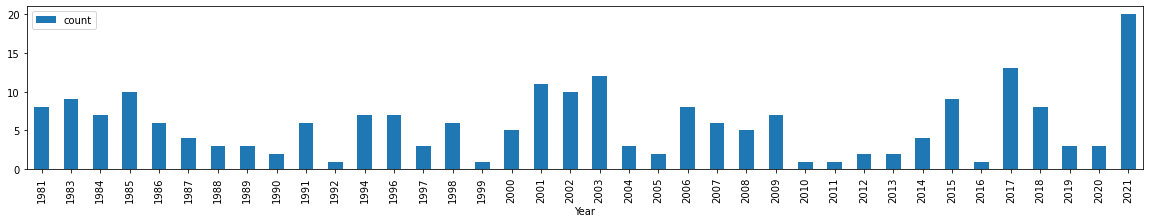

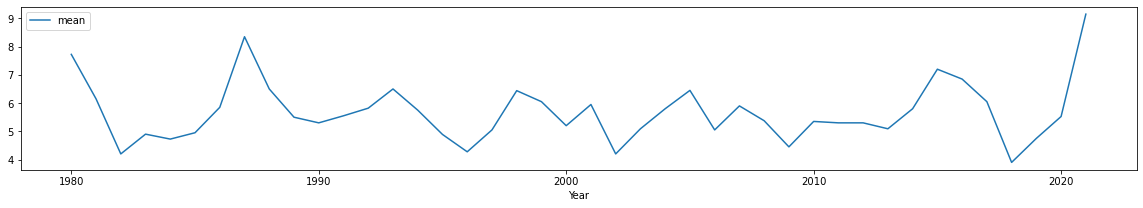

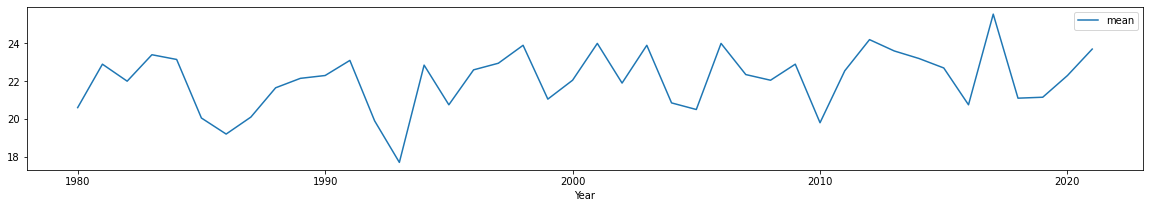

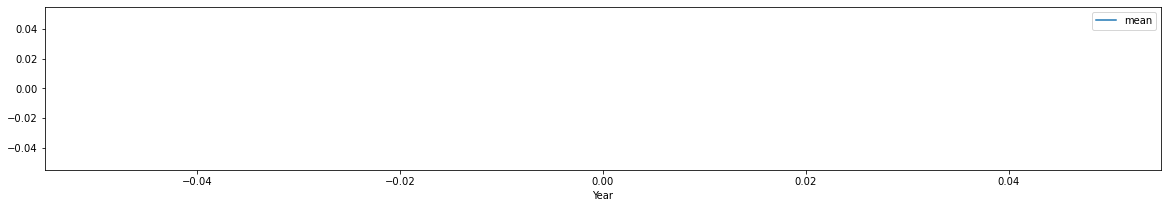

In [47]:
#tempData.head()
weatherdata.date=pd.to_datetime(weatherdata.date)

yseries = weatherdata['date'].dt.year
mseries = weatherdata['date'].dt.month
dseries = weatherdata['date'].dt.day
tempData = pd.DataFrame({'Date':weatherdata['date'],'Year': yseries,'Month': mseries ,'max_temperature':weatherdata['max_temperature'], 'avg_hourly_temperature':weatherdata['avg_hourly_temperature'], 'avg_temperature':weatherdata['avg_temperature']})
selectedData=tempData[(tempData['max_temperature'] > 30) & (tempData['Year'] >= 1980)]
number_of_hottest_daysInYears=selectedData.groupby(['Year']).agg(count = ('max_temperature','count'))
fig = plt.figure()
fig.set_size_inches(20,6)

number_of_hottest_daysInYears.plot(kind='bar',figsize=(20,3))

meanData=tempData[(tempData['Year'] >= 1980)].groupby(['Year']).agg(mean = ('avg_temperature','median'))
#print(meanData)
meanData.plot(kind='line',figsize=(20,3))

summerData=tempData[(tempData['Year'] >= 1980) & (tempData['Month'] >= 7) & (tempData['Month'] <= 9)]
summerMeanData=summerData.groupby(['Year']).agg(mean = ('max_temperature','median'))
#print(summerMeanData)
summerMeanData.plot(kind='line',figsize=(20,3))

winterData=tempData[(tempData['Year'] >= 1990) & (tempData['Month'] >= 12) & (tempData['Month'] <= 2)]
winterMeanData=winterData.groupby(['Year']).agg(mean = ('max_temperature','mean'))
#print(winterMeanData)
winterMeanData.plot(kind='line',figsize=(20,3))

## Guiding Questions

### 1. What is the recent trend of year-on-year energy consumption in the city?

#### Please explain .... 

In [ ]:

energydata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv", thousands=',')

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        x['Unit'] = 'GJ'
        return x
    else:
        return x


energydata = energydata.apply(lambda x: func(x), axis=1)
display(energydata)

energyResourcesData = energydata[(energydata['Energy Description'] != 'Electricity') & (energydata['Energy Description'] != 'District Energy')& (energydata['Total Consumption'] != 0.0)]

newData = energydata.groupby(['Energy Description', 'Year']).sum()


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']

fig = plt.figure()
fig.set_size_inches(15,6)

naturalGasConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Natural Gas']
solarEnergyConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Power']
solarThermalConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Thermal']

ngDataPlot = sns.lineplot(data=naturalGasConsumption, x="Year", y="Total Consumption")
seDataPlot = sns.lineplot(data=solarEnergyConsumption, x="Year", y="Total Consumption")
stDataPlot = sns.lineplot(data=solarThermalConsumption, x="Year", y="Total Consumption")

In [ ]:
plots = sns.pairplot(naturalGasConsumption, hue='Energy Description', height=10);

In [ ]:
plots = sns.pairplot(solarEnergyConsumption, hue='Energy Description', height=10);

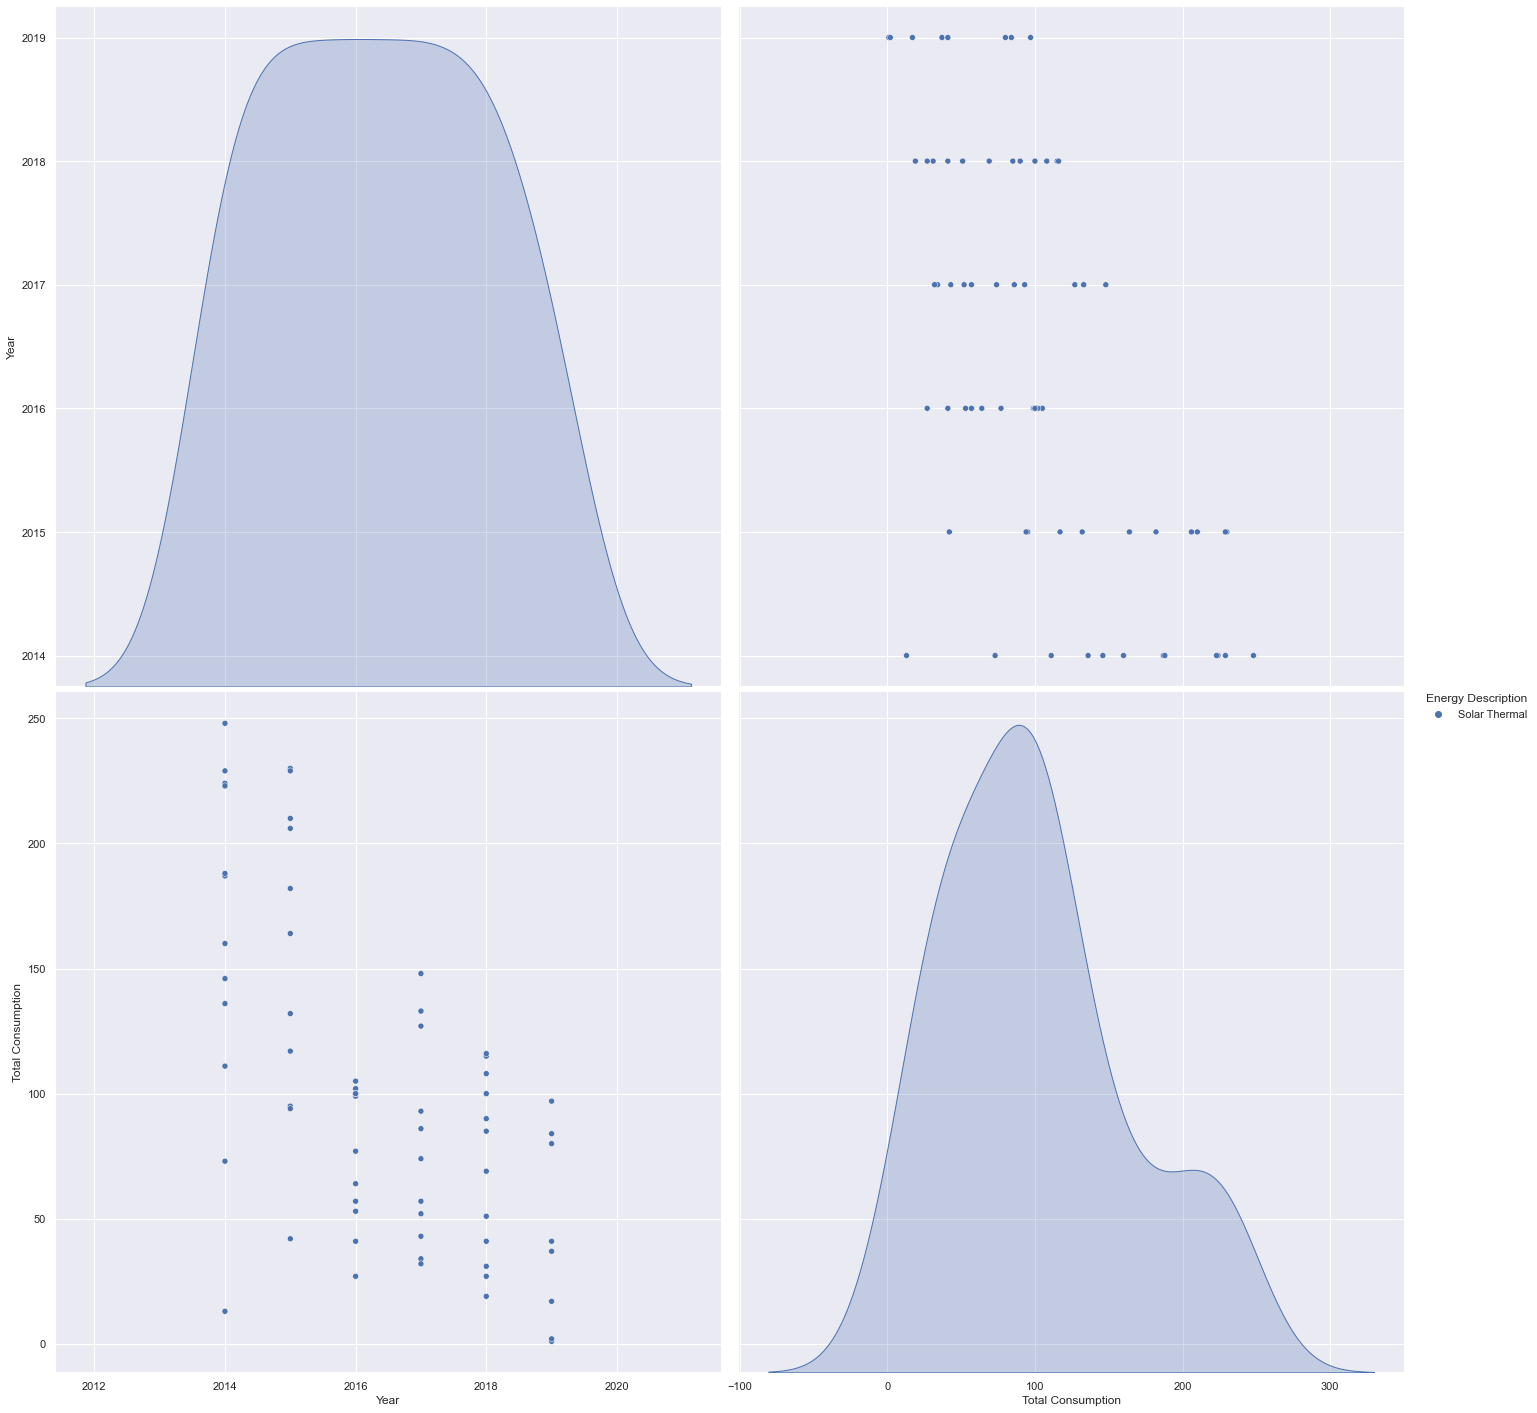

In [15]:
plots = sns.pairplot(solarThermalConsumption, hue='Energy Description', height=10);

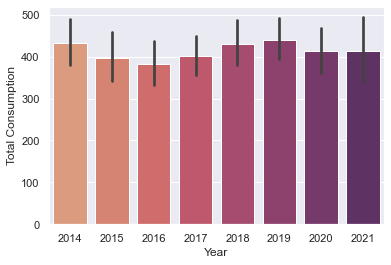

In [16]:
plot = sns.barplot(data=naturalGasConsumption, x="Year", y="Total Consumption", palette="flare")

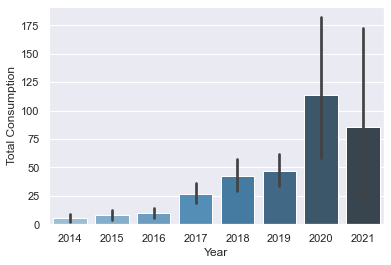

In [17]:
plot = sns.barplot(data=solarEnergyConsumption, x="Year", y="Total Consumption", palette="Blues_d")

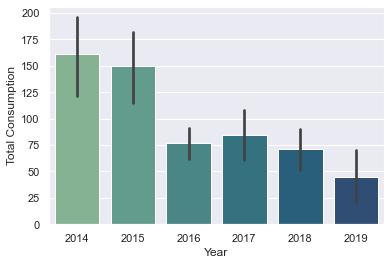

In [18]:
plot = sns.barplot(data=solarThermalConsumption, x="Year", y="Total Consumption", palette="crest")

### What’s the distribution of the energy production i.e., how much energy is being produced from renewable resources like solar and non-renewable resources like natural gas?

#### Please explain ....

===== Non Renewable Energy (Electricity & Natural Gas) ========


,Total Consumption
Year,
2014,3.583436e+06
2015,3.364074e+06
2016,3.294217e+06
2017,3.416959e+06
2018,3.618689e+06
2019,3.629713e+06
2020,3.407248e+06
2021,1.987246e+06


===== Renewable Energy (Solar Power & Solar Thermal)  ========


,Total Consumption
Year,
2014,2059.1508
2015,2137.5248
2016,1743.1540
2017,5094.7528
2018,10884.8364
2019,11766.6296
2020,20505.6720
2021,10937.8764


<Figure size 1080x432 with 0 Axes>

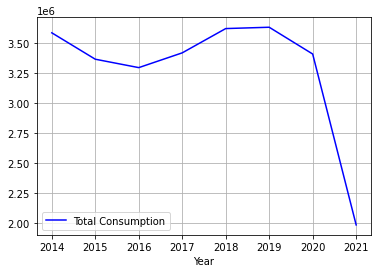

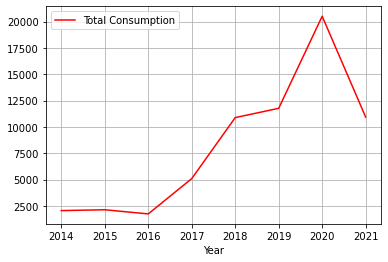

In [11]:

non_renewable_energy= energydata[(energydata['Energy Description'] == 'Electricity') | (energydata['Energy Description'] == 'Natural Gas')].groupby(['Year']).sum()
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')].groupby(['Year']).sum()

print("===== Non Renewable Energy (Electricity & Natural Gas) ========")
display(non_renewable_energy)
print("===== Renewable Energy (Solar Power & Solar Thermal)  ========")
display(renewable_energy)

fig = plt.figure()
fig.set_size_inches(15,6)

non_renewable_energy.plot(kind='line', color='b', grid=True)
renewable_energy.plot(kind='line', color='r', grid=True)

### In the end we willsum up different corporates and facilities energy consumption trends over the year and what’s their main source of resource of energy?

#### Please explain ....

In [37]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
rdata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv")

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: object
Unit: object


FacilityName,02F201 - INLAND ATHLETIC PARK,10B787 - ELLISTON PARK,17 AV & 1 ST SW PEDESTRIAN LIGHTING,17 AV & 8 ST SW PEDESTRIAN LIGHTING,17 AV & MACLEOD TR SE PEDESTRIAN LIGHTING,19 ST DEPOT,200 6704 6 ST SW HOUSING,210 15 AV NE HOUSING,3 ST BARCLAY MALL,4 CORNERS OFFICE BUILDING,...,WSP002,WSP016,WSP019,WSP028,WSP033,WSP034,WSP037,WSP494,WSP497,WSP498
Year,,,,,,,,,,,,,,,,,,,,,
2014,884.0,7208.0,NaN,NaN,NaN,6148.0,NaN,NaN,6448.0,NaN,...,63.0,63.0,NaN,348.0,82.0,63.0,63.0,1.0,113.0,63.0
2015,1529.0,7575.0,NaN,NaN,NaN,5389.0,NaN,NaN,4279.0,NaN,...,63.0,63.0,NaN,342.0,76.0,63.0,63.0,1.0,14.0,63.0
2016,NaN,7221.0,NaN,NaN,NaN,5514.0,27207.0,15205.0,4663.0,NaN,...,63.0,91.0,NaN,353.0,74.0,63.0,63.0,1.0,7.0,63.0
2017,NaN,7156.0,NaN,NaN,NaN,6921.0,45881.0,28694.0,996.0,NaN,...,NaN,NaN,36.0,357.0,82.0,NaN,NaN,1.0,14.0,NaN
2018,1933.0,8206.0,NaN,NaN,NaN,2969.0,19255.0,NaN,5387.0,NaN,...,NaN,NaN,136.0,332.0,69.0,NaN,NaN,NaN,13.0,NaN
2019,981.0,8335.0,NaN,NaN,NaN,4929.0,NaN,NaN,9315.0,NaN,...,NaN,NaN,132.0,344.0,3856.0,NaN,NaN,NaN,8.0,NaN
2020,912.0,8309.0,642.0,741.0,NaN,6458.0,NaN,NaN,11604.0,8453.0,...,NaN,NaN,132.0,357.0,2739.0,NaN,NaN,NaN,NaN,NaN
2021,NaN,4797.0,482.0,462.0,890.0,3365.0,NaN,NaN,4377.0,8040.0,...,NaN,NaN,80.0,204.0,491.0,NaN,NaN,NaN,5.0,NaN


<Figure size 259200x259200 with 0 Axes>

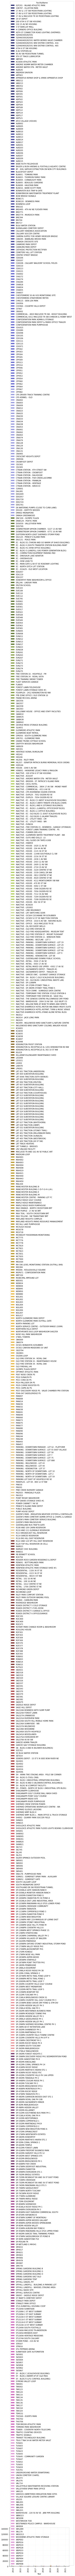

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
2404 50 ST SE HOUSING,NaN,NaN,NaN,NaN,NaN,17.0,445.0,230.0
4 CORNERS OFFICE BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,247.0,435.0
52 ST EAST AREA OFFICE,437.0,414.0,402.0,292.0,262.0,314.0,311.0,175.0
66 ST DEPOT,116.0,90.0,86.0,102.0,102.0,18.0,NaN,NaN
90 AV DEPOT,526.0,488.0,426.0,424.0,418.0,459.0,437.0,226.0
...,...,...,...,...,...,...,...,...
WESTWINDS POLICE CAMPUS - EAST BUILDING,1380.0,1206.0,1984.0,1887.0,3267.0,1324.0,2475.0,884.0
WESTWINDS POLICE CAMPUS - WAREHOUSE,NaN,NaN,2824.0,3491.0,3821.0,3803.0,4025.0,2347.0
WESTWINDS POLICE CAMPUS - WEST BUILDING,1051.0,1910.0,1982.0,3236.0,1730.0,1630.0,1559.0,1161.0


<Figure size 259200x259200 with 0 Axes>

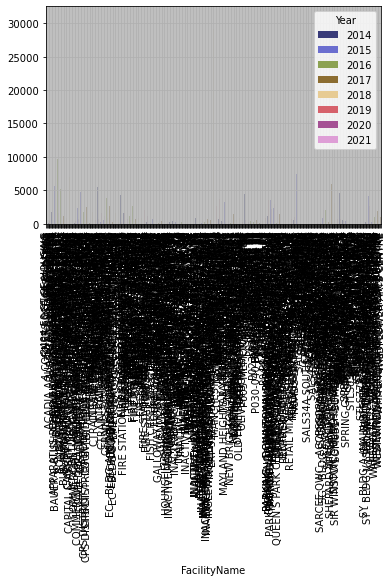

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BEARSPAW SALT SILO,1500.0,969.0,886.0,1395.0,1451.0,1139.0,578.0,642.0
CORPORATE WAREHOUSE,NaN,NaN,229.0,976.0,976.0,309.0,925.0,NaN
CTRAIN STATION - 69TH STREET SW,NaN,NaN,NaN,NaN,844.0,NaN,NaN,NaN
FIRE HEADQUARTERS,NaN,NaN,NaN,1248.0,1123.0,778.0,1259.0,632.0
FIRE STATION 05 - SOUTH CALGARY,NaN,1794.0,5159.0,5302.0,5272.0,4259.0,3379.0,2356.0
FIRE STATION 07 - MOUNT PLEASANT,NaN,NaN,NaN,1649.0,2015.0,1209.0,804.0,1326.0
FIRE STATION 08 - ROSSCARROCK,NaN,415.0,1166.0,1235.0,1236.0,1183.0,887.0,696.0
FIRE STATION 22 - TEMPLE,265.0,NaN,1226.0,1795.0,1824.0,1753.0,1404.0,1003.0
FIRE STATION 24 - CEDARBRAE,NaN,614.0,915.0,1711.0,1721.0,1439.0,1101.0,796.0


<Figure size 259200x259200 with 0 Axes>

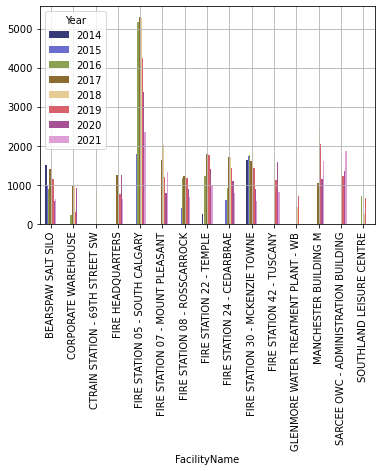

In [39]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1['Total Consumption'] = pd.to_numeric(df1['Total Consumption'], errors='coerce')
df1=df1.loc[df1['Total Consumption'] > 0]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df1)

fig = plt.figure()
df1.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2['Total Consumption'] = pd.to_numeric(df2['Total Consumption'], errors='coerce')
df2 =df2.loc[df2['Total Consumption'] > 0]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3['Total Consumption'] = pd.to_numeric(df3['Total Consumption'], errors='coerce')
df3=df3.loc[df3['Total Consumption'] > 0]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)

display(df3)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


